In [1]:
#importing required modules

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf

In [2]:
#initiating spark & sql context

spark = SparkSession.builder \
        .master("yarn") \
        .appName("Customer_Churn") \
        .enableHiveSupport() \
        .getOrCreate()
sqlContext = SQLContext(spark)

In [3]:
#reading the training data

training_df = sqlContext.read.load
              ("C:/Users/User/Downloads/churn-bigml-80.csv",
              format='com.databricks.spark.csv',
              header='true',
              inferschema='true')

In [4]:
#reading the testing data

testing_df = sqlContext.read.load
             ("C:/Users/User/Downloads/churn-bigml-20.csv",
             format='com.databricks.spark.csv',
             header='true',
             inferschema='true')

In [5]:
#caching the dataframe in the memory for faster processing
#printing the dataframe schema. That's DataFrame = Dataset[Row]
 
training_df.cache()
training_df.printSchema()

root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: integer (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



In [6]:
#converting the dataframe into pandas df and then displaying the first 5 rows or Spark Dataset
training_df.toPandas().head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
#describe function in pyspark is similar to the summary function-it displays the summary statistics of the numeric variables

#displaying the summary statistics of the numeric variables & transposing for better viewing

num_set = training_df.describe().toPandas().transpose()
num_set

,0,1,2,3,4
summary,count,mean,stddev,min,max
State,2666,None,None,AK,WY
Account length,2666,100.62040510127532,39.56397365334985,1,243
Area code,2666,437.43885971492875,42.521018019427174,408,510
International plan,2666,None,None,No,Yes
Voice mail plan,2666,None,None,No,Yes
Number vmail messages,2666,8.021755438859715,13.61227701829193,0,50
Total day minutes,2666,179.48162040510135,54.21035022086982,0.0,350.8
Total day calls,2666,100.31020255063765,19.988162186059512,0,160
Total day charge,2666,30.512404351087813,9.215732907163497,0.0,59.64


In [8]:
#displaying the numeric index

num_set.index.values

array(['summary', 'State', 'Account length', 'Area code',
       'International plan', 'Voice mail plan', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'], dtype=object)

In [9]:
#dropping the `summary` and `Area code` columns (as 'summary' is just the header and 'Area code' is similar to 'State') 
#and slicing the dataframe using the numeric index

new_training_df = training_df.toPandas()
new_training_df = new_training_df[num_set.index.drop(['summary','Area code'])]
new_training_df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


"\nn = len(new_training_df.columns)\nfor i in range(n):\n    for j in range(n):\n        # to get the axis of subplots\n        ax = axs[i, j]\n        # to make x axis name vertical  \n        ax.xaxis.label.set_rotation(90)\n        # to make y axis name horizontal \n        ax.yaxis.label.set_rotation(0)\n        # to make sure y axis names are outside the plot area\n        ax.yaxis.labelpad = 50\n       \n# Rotate axis labels and remove axis ticks\nn = len(new_training_df.columns)\nfor i in range(n):\n    v = graph[i, 0]\n    v.yaxis.label.set_rotation(0)\n    v.yaxis.label.set_ha('right')\n    v.set_yticks(())\n    h = graph[n-1, i]\n    h.xaxis.label.set_rotation(90)\n    h.set_xticks(())\n       \n       "

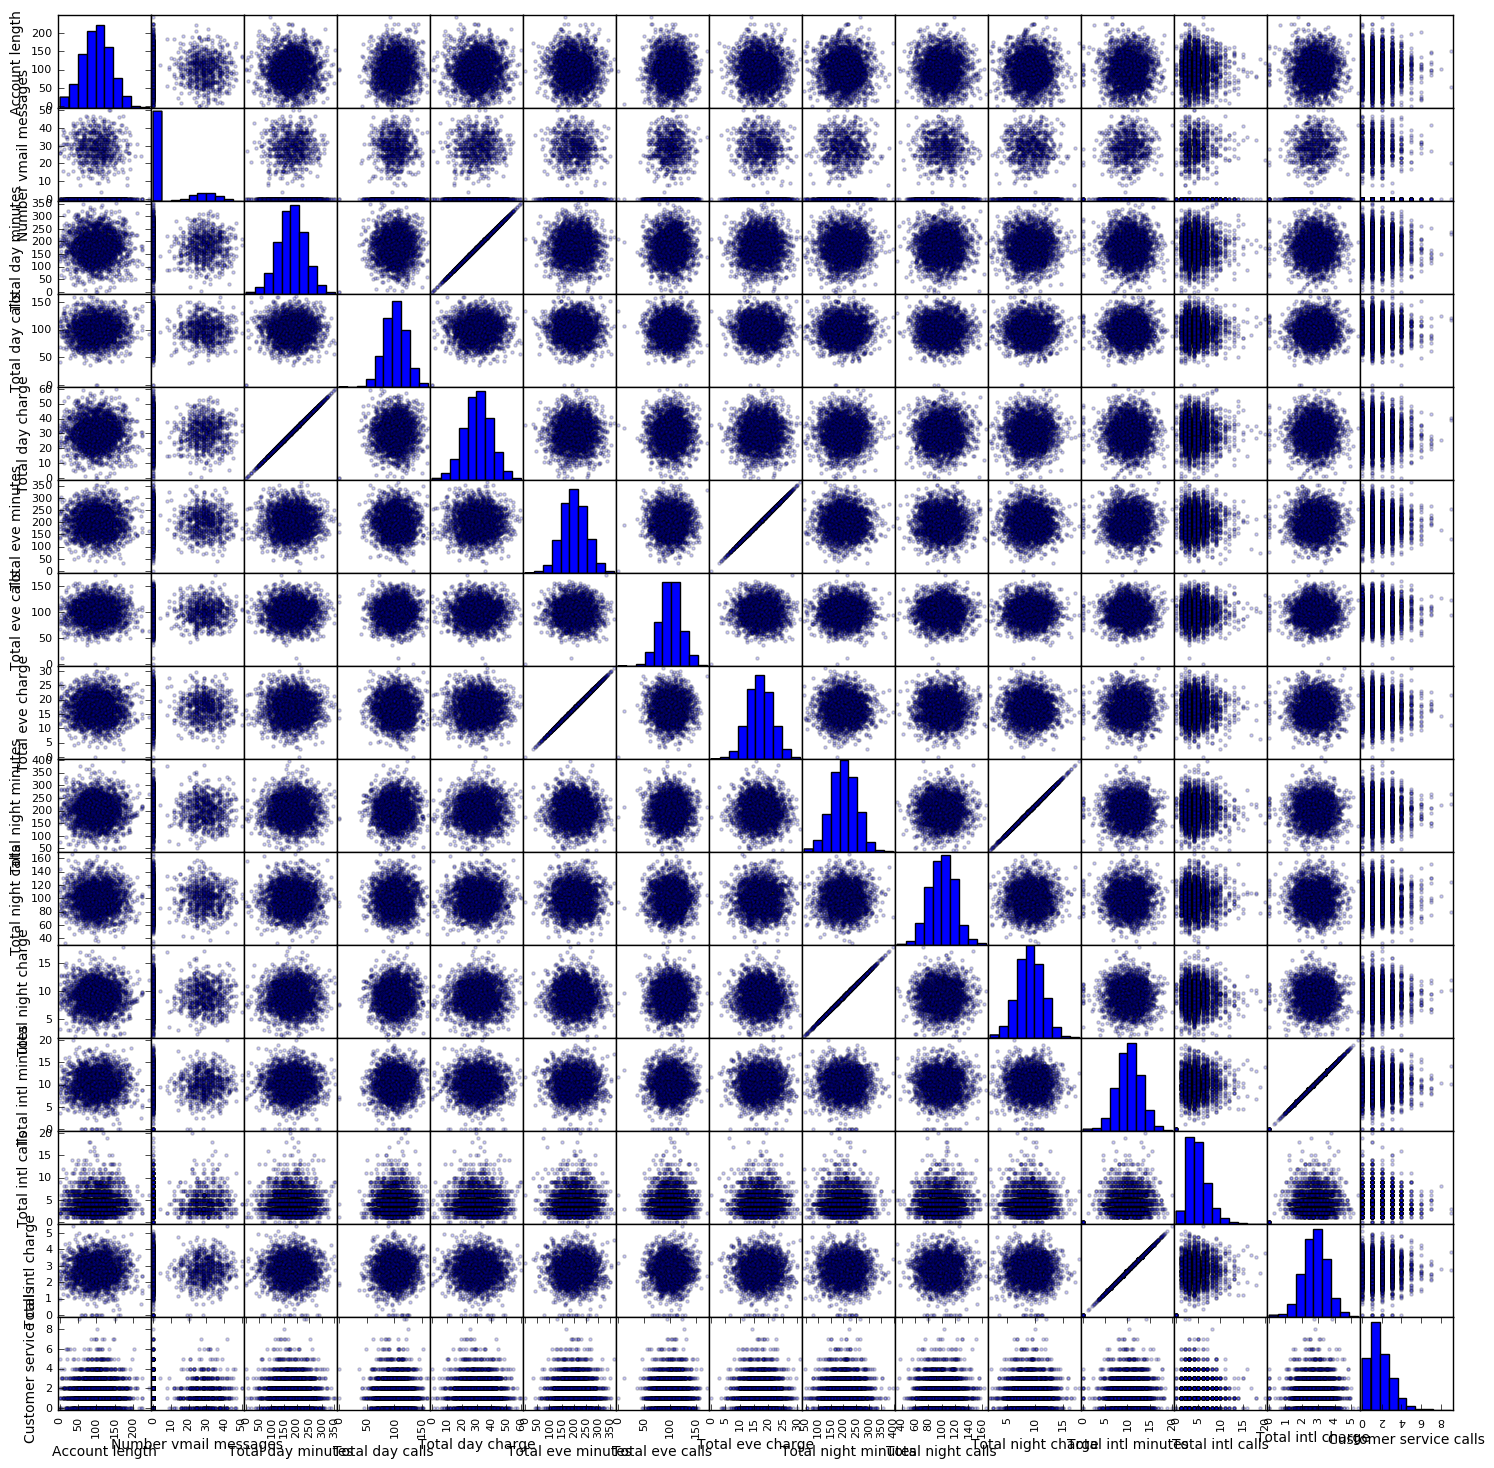

In [10]:
#plotting the correlation matrix to determine correlated variables
#from pandas.tools.plotting import scatter_matrix

axs = pd.scatter_matrix(new_training_df, figsize=(18,18), alpha=0.2, diagonal='hist')

plt.xticks(rotation=180)
plt.yticks(rotation=90)

#plt.tight_layout()
'''
n = len(new_training_df.columns)
for i in range(n):
    for j in range(n):
        # to get the axis of subplots
        ax = axs[i, j]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
       
# Rotate axis labels and remove axis ticks
n = len(new_training_df.columns)
for i in range(n):
    v = graph[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = graph[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())
       
       '''

In [11]:
#creating a binary map for converting categorical variables to binary (i.e. float)

binary_map = {'Yes':1.0, 'No':0.0, 'True':1.0, 'False':0.0}

In [12]:
#removing correlated and unneccessary columns

col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
train_df = training_df.toPandas().drop(col_to_drop, axis=1)

In [13]:
#changing categorical data to numeric for the training data

train_df[['International plan', 'Voice mail plan', 'Churn']] = train_df[['International plan', 'Voice mail plan', 'Churn']].replace(binary_map)
train_df[['Churn']] = train_df[['Churn']].apply(lambda d: d.astype(float))

In [14]:
#displaying the training data after transformation

train_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,0.0,1.0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0.0
1,107,0.0,1.0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0.0
2,137,0.0,0.0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0.0
3,84,1.0,0.0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0.0
4,75,1.0,0.0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0.0


In [15]:
#performing the same transformation to the 20% test data

test_df = testing_df.toPandas().drop(col_to_drop, axis=1)
test_df[['International plan', 'Voice mail plan', 'Churn']] = test_df[['International plan', 'Voice mail plan', 'Churn']].replace(binary_map)
test_df[['Churn']] = test_df[['Churn']].apply(lambda d: d.astype(float))

In [16]:
#displaying the testing data after transformation

test_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,0.0,0.0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0.0
1,65,0.0,0.0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1.0
2,161,0.0,0.0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1.0
3,111,0.0,0.0,0,110.4,103,137.3,102,189.6,105,7.7,6,2,0.0
4,49,0.0,0.0,0,119.3,117,215.1,109,178.7,90,11.1,1,1,0.0


In [17]:
#creating a spark dataframe and displaying the first 5 rows

train_sparkdf = sqlContext.createDataFrame(train_df)
train_sparkdf.take(5)

[Row(Account length=128, International plan=0.0, Voice mail plan=1.0, Number vmail messages=25, Total day minutes=265.1, Total day calls=110, Total eve minutes=197.4, Total eve calls=99, Total night minutes=244.7, Total night calls=91, Total intl minutes=10.0, Total intl calls=3, Customer service calls=1, Churn=0.0),
 Row(Account length=107, International plan=0.0, Voice mail plan=1.0, Number vmail messages=26, Total day minutes=161.6, Total day calls=123, Total eve minutes=195.5, Total eve calls=103, Total night minutes=254.4, Total night calls=103, Total intl minutes=13.7, Total intl calls=3, Customer service calls=1, Churn=0.0),
 Row(Account length=137, International plan=0.0, Voice mail plan=0.0, Number vmail messages=0, Total day minutes=243.4, Total day calls=114, Total eve minutes=121.2, Total eve calls=110, Total night minutes=162.6, Total night calls=104, Total intl minutes=12.2, Total intl calls=5, Customer service calls=0, Churn=0.0),
 Row(Account length=84, International pl

In [18]:
#creating a spark dataframe of the test df and displaying the first 5 rows

test_sparkdf = sqlContext.createDataFrame(test_df)
test_sparkdf.take(5)

[Row(Account length=117, International plan=0.0, Voice mail plan=0.0, Number vmail messages=0, Total day minutes=184.5, Total day calls=97, Total eve minutes=351.6, Total eve calls=80, Total night minutes=215.8, Total night calls=90, Total intl minutes=8.7, Total intl calls=4, Customer service calls=1, Churn=0.0),
 Row(Account length=65, International plan=0.0, Voice mail plan=0.0, Number vmail messages=0, Total day minutes=129.1, Total day calls=137, Total eve minutes=228.5, Total eve calls=83, Total night minutes=208.8, Total night calls=111, Total intl minutes=12.7, Total intl calls=6, Customer service calls=4, Churn=1.0),
 Row(Account length=161, International plan=0.0, Voice mail plan=0.0, Number vmail messages=0, Total day minutes=332.9, Total day calls=67, Total eve minutes=317.8, Total eve calls=97, Total night minutes=160.6, Total night calls=128, Total intl minutes=5.4, Total intl calls=9, Customer service calls=4, Churn=1.0),
 Row(Account length=111, International plan=0.0, 

In [19]:
#importing the necessary libraries

from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.tree import RandomForest, RandomForestModel
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.classification import LogisticRegressionModel, LogisticRegressionWithLBFGS
from pyspark.mllib.classification import SVMModel, SVMWithSGD

In [20]:
#separating the features and the target variable

def labelData(data):
    return data.rdd.map(lambda row: LabeledPoint(row[-1], row[:-1]))

#displaying the target variable and feature variables

labelData(train_sparkdf).takeSample(True, 5)

[LabeledPoint(0.0, [112.0,0.0,1.0,29.0,198.8,122.0,238.6,114.0,289.5,69.0,11.5,5.0,1.0]),
 LabeledPoint(0.0, [98.0,0.0,0.0,0.0,162.8,65.0,185.0,109.0,219.5,104.0,6.0,3.0,2.0]),
 LabeledPoint(0.0, [111.0,0.0,0.0,0.0,191.3,80.0,138.5,94.0,246.0,107.0,6.4,3.0,2.0]),
 LabeledPoint(0.0, [172.0,0.0,0.0,0.0,203.9,109.0,234.0,123.0,160.7,65.0,17.8,4.0,4.0]),
 LabeledPoint(1.0, [148.0,0.0,0.0,0.0,279.3,104.0,201.6,87.0,280.8,99.0,7.9,2.0,2.0])]

In [21]:
#similarly for the test data

labelData(test_sparkdf).takeSample(True, 5)

[LabeledPoint(0.0, [68.0,0.0,0.0,0.0,148.8,70.0,246.5,164.0,129.8,103.0,12.1,3.0,3.0]),
 LabeledPoint(1.0, [138.0,1.0,1.0,28.0,211.2,117.0,312.5,98.0,178.0,118.0,10.7,2.0,3.0]),
 LabeledPoint(0.0, [31.0,0.0,0.0,0.0,97.5,129.0,260.4,78.0,88.7,100.0,7.0,5.0,1.0]),
 LabeledPoint(0.0, [140.0,0.0,1.0,28.0,157.1,77.0,172.4,97.0,184.5,94.0,11.1,9.0,1.0]),
 LabeledPoint(1.0, [81.0,0.0,0.0,0.0,324.7,48.0,236.4,82.0,187.6,78.0,13.1,5.0,0.0])]

In [22]:
#modifying the test data for model evaluation

final_testing_data = labelData(test_sparkdf)

In [23]:
#dividing the dataset into training data and test data

training_data, testing_data = labelData(train_sparkdf).randomSplit([0.75, 0.25])

In [24]:
#defining a function to get the prediction labels for the testing data

def getPredictionLabels(model, testing_data):
    predictions = model.predict(testing_data.map(lambda r: r.features))
    return predictions.zip(testing_data.map(lambda r: r.label))

#defining a function to get the model evaluation metrics

def printMetrics(predictions_and_labels):
    metrics = MulticlassMetrics(predictions_and_labels)
    print('Precision of True ', metrics.precision(1))
    print('Precision of False', metrics.precision(0))
    print('Recall of True / False Positive  ', metrics.recall(1))
    print('Recall of False / False Negative  ', metrics.recall(0))
    print('F-1 Score \n\n ', metrics.fMeasure())
    print(pd.DataFrame([['True Positive','False Negative'],['False Positive','True Negative']]))
    print('\nConfusion Matrix \n\n {}'.format(metrics.confusionMatrix().toArray()))

In [26]:
#designing the model

#1. Decision Trees

#mapping the categorical variables to number of categories
#index 1 `International plan` has 2 variables (Yes/No, 1/0) and Index 2 'Voice mail plan' has 2 variables (Yes/No, 1/0)

model_dt_1 = DecisionTree.trainClassifier(training_data, numClasses=2, 
                                          categoricalFeaturesInfo={1:2, 2:2}, 
                                          maxDepth=4, impurity='gini', maxBins=32)

# toDebugString() function provides a print of the tree's decision nodes and final prediction outcomes at the end leafs
print(model_dt_1.toDebugString())

DecisionTreeModel classifier of depth 4 with 31 nodes
  If (feature 4 <= 260.8)
   If (feature 12 <= 3.0)
    If (feature 1 in {1.0})
     If (feature 10 <= 13.2)
      Predict: 0.0
     Else (feature 10 > 13.2)
      Predict: 1.0
    Else (feature 1 not in {1.0})
     If (feature 4 <= 224.6)
      Predict: 0.0
     Else (feature 4 > 224.6)
      Predict: 0.0
   Else (feature 12 > 3.0)
    If (feature 4 <= 165.8)
     If (feature 4 <= 137.6)
      Predict: 1.0
     Else (feature 4 > 137.6)
      Predict: 1.0
    Else (feature 4 > 165.8)
     If (feature 6 <= 149.4)
      Predict: 1.0
     Else (feature 6 > 149.4)
      Predict: 0.0
  Else (feature 4 > 260.8)
   If (feature 6 <= 186.9)
    If (feature 4 <= 277.3)
     If (feature 8 <= 276.9)
      Predict: 0.0
     Else (feature 8 > 276.9)
      Predict: 1.0
    Else (feature 4 > 277.3)
     If (feature 8 <= 200.4)
      Predict: 0.0
     Else (feature 8 > 200.4)
      Predict: 1.0
   Else (feature 6 > 186.9)
    If (feature 3 <= 0.0)
 

In [29]:
#obtaining predictions on the testing data using decision tree model-1

predictions_and_labels_dt_1 = getPredictionLabels(model_dt_1, testing_data)
predictions_and_labels_dt_1.take(5)

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]

In [30]:
#obtaining evaluation metrics for decision tree model-1

printMetrics(predictions_and_labels_dt_1)

Precision of True  0.8253968253968254
Precision of False 0.9152542372881356
Recall of True / False Positive   0.5098039215686274
Recall of False / False Negative   0.9800362976406534
F-1 Score 

  0.9065849923430321
                0               1
0   True Positive  False Negative
1  False Positive   True Negative


C:\Spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\mllib\evaluation.py:262: UserWarning:

Deprecated in 2.0.0. Use accuracy.




Confusion Matrix 

 [[ 540.   11.]
 [  50.   52.]]


In [31]:
#since, the recall score for 1 & 0 have high discrepancy, the model might be biased towards the majority class
#so, we find the distribution of the target variable in the training data

train_sparkdf.groupBy('Churn').count().toPandas()

,Churn,count
0,0.0,2278
1,1.0,388


In [32]:
#stratified sampling divides the data into different subgroups or strata and helps in getting a balanced dataset

#sampling all the 1s (100% of ones) and 20% of zeros

strat_train_sparkdf = train_sparkdf.sampleBy('Churn', fractions={0:0.2, 1:1.0})
strat_train_sparkdf.groupBy('Churn').count().toPandas()

,Churn,count
0,0.0,444
1,1.0,388


In [33]:
#dividing the new dataset into training data and test data

st_training_data, st_testing_data = labelData(strat_train_sparkdf).randomSplit([0.75, 0.25])

In [34]:
#designing the model

#2. Decision Trees

model_dt_2 = DecisionTree.trainClassifier(st_training_data, numClasses=2, 
                                          categoricalFeaturesInfo={1:2, 2:2}, 
                                          maxDepth=4, impurity='gini', maxBins=32 )

predictions_and_labels_dt_2 = getPredictionLabels(model_dt_2, testing_data)
printMetrics(predictions_and_labels_dt_2)

Precision of True  0.5337837837837838
Precision of False 0.9544554455445544
Recall of True / False Positive   0.7745098039215687
Recall of False / False Negative   0.8747731397459165
F-1 Score 

  0.8591117917304747
                0               1
0   True Positive  False Negative
1  False Positive   True Negative


C:\Spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\mllib\evaluation.py:262: UserWarning:

Deprecated in 2.0.0. Use accuracy.




Confusion Matrix 

 [[ 482.   69.]
 [  23.   79.]]


In [35]:
#designing the model

#2. Decision Trees

model_dt_2 = DecisionTree.trainClassifier(st_training_data, numClasses=2, 
                                          categoricalFeaturesInfo={1:2, 2:2}, 
                                          maxDepth=4, impurity='gini', maxBins=32 )

predictions_and_labels_dt_2 = getPredictionLabels(model_dt_2, st_testing_data)
printMetrics(predictions_and_labels_dt_2)

Precision of True  0.8241758241758241
Precision of False 0.768
Recall of True / False Positive   0.7211538461538461
Recall of False / False Negative   0.8571428571428571
F-1 Score 

  0.7916666666666666
                0               1
0   True Positive  False Negative
1  False Positive   True Negative


C:\Spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\mllib\evaluation.py:262: UserWarning:

Deprecated in 2.0.0. Use accuracy.




Confusion Matrix 

 [[ 96.  16.]
 [ 29.  75.]]


In [36]:
#designing the model

#3. Random Forests without using startified sapmled data

model_rf_1 = RandomForest.trainClassifier(training_data, numClasses=2, categoricalFeaturesInfo={},
                                          numTrees=20, featureSubsetStrategy="auto",
                                          impurity='gini', maxDepth=4, maxBins=32)

predictions_and_labels_rf_1 = getPredictionLabels(model_rf_1, testing_data)

printMetrics(predictions_and_labels_rf_1)

Precision of True  0.8947368421052632
Precision of False 0.9144295302013423
Recall of True / False Positive   0.5
Recall of False / False Negative   0.9891107078039928
F-1 Score 

  0.9127105666156202
                0               1
0   True Positive  False Negative
1  False Positive   True Negative


C:\Spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\mllib\evaluation.py:262: UserWarning:

Deprecated in 2.0.0. Use accuracy.




Confusion Matrix 

 [[ 545.    6.]
 [  51.   51.]]


In [37]:
#designing the model

#4. Random Forests using startified sapmled data

model_rf_2 = RandomForest.trainClassifier(st_training_data, numClasses=2, categoricalFeaturesInfo={},
                                          numTrees=20, featureSubsetStrategy="auto",
                                          impurity='gini', maxDepth=4, maxBins=32)

predictions_and_labels_rf_2 = getPredictionLabels(model_rf_2, st_testing_data)

printMetrics(predictions_and_labels_rf_2)

Precision of True  0.8651685393258427
Precision of False 0.7874015748031497
Recall of True / False Positive   0.7403846153846154
Recall of False / False Negative   0.8928571428571429
F-1 Score 

  0.8194444444444444
                0               1
0   True Positive  False Negative
1  False Positive   True Negative


C:\Spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\mllib\evaluation.py:262: UserWarning:

Deprecated in 2.0.0. Use accuracy.




Confusion Matrix 

 [[ 100.   12.]
 [  27.   77.]]


In [133]:
#designing the model

#5. Gradient Bossting without using startified sapmled data

model_gb_1 = GradientBoostedTrees.trainClassifier(training_data,
                                                  categoricalFeaturesInfo={}, numIterations=30)

predictions_and_labels_gb_1 = getPredictionLabels(model_gb_1, testing_data)

printMetrics(predictions_and_labels_gb_1)

Precision of True  0.9186046511627907
Precision of False 0.948073701842546
Recall of True / False Positive   0.7181818181818181
Recall of False / False Negative   0.987783595113438
F-1 Score 

  0.9443631039531479
                0               1
0   True Positive  False Negative
1  False Positive   True Negative


C:\Spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\mllib\evaluation.py:262: UserWarning:

Deprecated in 2.0.0. Use accuracy.




Confusion Matrix 

 [[ 566.    7.]
 [  31.   79.]]


In [38]:
#designing the model

#5. Gradient Bossting using startified sapmled data

model_gb_2 = GradientBoostedTrees.trainClassifier(st_training_data,
                                                  categoricalFeaturesInfo={}, numIterations=30)

predictions_and_labels_gb_2 = getPredictionLabels(model_gb_2, st_testing_data)

printMetrics(predictions_and_labels_gb_2)

Precision of True  0.8543689320388349
Precision of False 0.8584070796460177
Recall of True / False Positive   0.8461538461538461
Recall of False / False Negative   0.8660714285714286
F-1 Score 

  0.8564814814814815
                0               1
0   True Positive  False Negative
1  False Positive   True Negative


C:\Spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\mllib\evaluation.py:262: UserWarning:

Deprecated in 2.0.0. Use accuracy.




Confusion Matrix 

 [[ 97.  15.]
 [ 16.  88.]]


In [141]:
#designing the model

#5. Logistic Regression without using startified sapmled data

#model_lr_1 = LogisticRegressionWithLBFGS.train(training_data)

#predictions_and_labels_lr_1 = getPredictionLabels(model_lr_1, testing_data)

#printMetrics(predictions_and_labels_lr_1)

In [145]:
#designing the model

#5. SVM without using startified sapmled data

#model_svm_1 = SVMWithSGD.train(training_data, iterations=100)

#predictions_and_labels_svm_1 = getPredictionLabels(model_svm_1, testing_data)

#printMetrics(predictions_and_labels_svm_1)

In [ ]:
#testing on the final model

In [39]:
#finally, testing the final model which is random forests using the stratified sampling data

predictions_and_labels_final = getPredictionLabels(model_rf_2, final_testing_data)

printMetrics(predictions_and_labels_final)

Precision of True  0.576271186440678
Precision of False 0.9508196721311475
Recall of True / False Positive   0.7157894736842105
Recall of False / False Negative   0.9125874125874126
F-1 Score 

  0.8845577211394303
                0               1
0   True Positive  False Negative
1  False Positive   True Negative


C:\Spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\mllib\evaluation.py:262: UserWarning:

Deprecated in 2.0.0. Use accuracy.




Confusion Matrix 

 [[ 522.   50.]
 [  27.   68.]]
